The goal of this notebook is to write and tune the code for a general reference trajectory function for the centerline of an anguilliform swimmer

The general form of an anguilliform gait is given by
$$ h(z,t) = a(z) sin(kz - \omega t)$$

where $z$ is the axial (swimming) direction measured along the fish axis from tip of th fish's head; $h(z,t)$ is tha lateral excusion of the body at titme $t$; $a(z)$ is the ampligtude envelope of the lateral motion as a functino of $z$; $k$ is the wave number of the body uindulations that corresponds to a awavelength $\lambda$; and $\omega$ is the angular frequency.

For anguilliform kinematics, the amplitude engelvope is approximated by an exponential function 
$$a(z) = a_{max} e^{z-1}$$

where $a_{max}$ is the tail-beat amplitude and is set equal to 0.1 (Hultmakr et al., 2007).

In [16]:
 # imports
 #!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.utils.extmath import randomized_svd
 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from dotenv import dotenv_values 
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

from util import *
config = dotenv_values(".env")

In [17]:
# Function to provide coordinates of discretized centerline at a given time
def generateCenterlineCoords(time,numPoints,a_max=0.1,k=10,omega=7):
    # Generate normalized x coordinates
    x = np.linspace(0,1,numPoints)
    # Generate z coordinates 
    z = a_max*np.exp(x-1)*np.sin(k*x-omega*time)
    z = z-z[0]
    return x,z


(-0.5, 0.5)

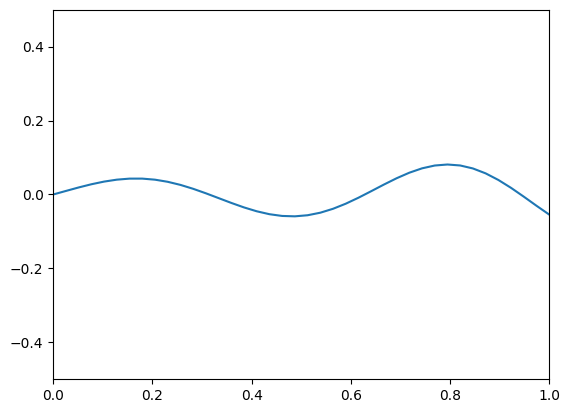

In [18]:
# Plot centerline coordinates at a given time
t = 0
x,z = generateCenterlineCoords(t,40)
plt.plot(x,z)
# Plot limits
plt.xlim(0,1)
plt.ylim(-0.5,0.5)

Moviepy - Building video /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/referenceCenterline.mp4.
Moviepy - Writing video /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/referenceCenterline.mp4



t:   1%|          | 3/300 [00:00<00:11, 26.17it/s, now=None]

Moviepy - Done !
Moviepy - video ready /home/brdl/iman/dev/sofaProjects/anguilliformOptimalControl/data/visualizations/referenceCenterline.mp4


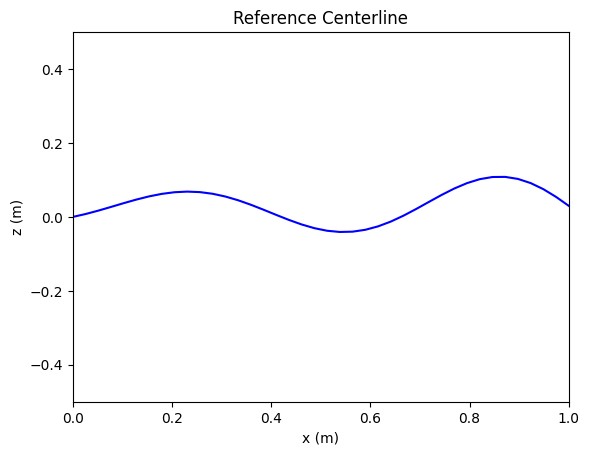

In [19]:
# Make video of centerline over a couple cycles
# Configure save path for video
savePath = config["currentDirectory"] +"data/visualizations/"
saveName = "referenceCenterline.mp4"
numFrames = 300
fps = 30
duration = numFrames/fps


# Set up figure for animation
fig, ax = plt.subplots()


# Animation callback
def animate(t):
    # Get frame index
    i = int(round(t*fps))
    # Compute centerline
    x,z = generateCenterlineCoords(t,40)
    # Plot mesh points from original centerline
    ax.clear()
    ax.plot(x,z,color='blue')
    ax.set_xlim(0,1)
    ax.set_ylim(-0.5,0.5)
    # ax.set_aspect('equal')
    ax.set_title("Reference Centerline")
    ax.set_xlabel("x (m)")
    ax.set_ylabel("z (m)")
    return mplfig_to_npimage(fig)

# Create animation
animation = VideoClip(animate, duration=duration)
animation.write_videofile(savePath+saveName, fps=fps)
    
